In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [3]:
data=pd.read_csv("C:\\unikaksha\\datascience\\project_DS\\MINI - 9 - heart disease prediction using decision tree\\Heart Disease Dataset.csv")

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
data.columns[data.isnull().any()].tolist()

[]

In [9]:
data.shape

(303, 14)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [13]:
feature=data.iloc[:,:-1]
target=data.iloc[:,-1]

In [14]:
feature.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [17]:
target.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

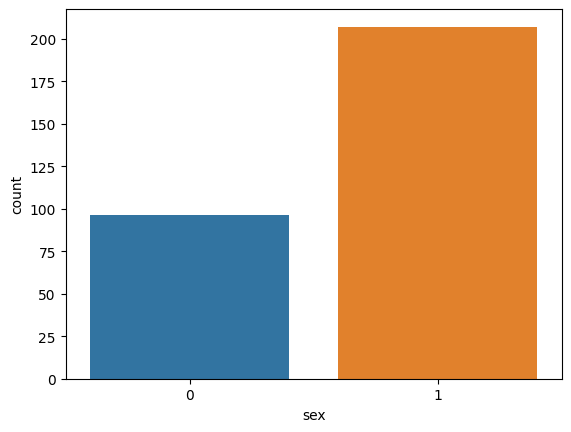

In [22]:
sns.countplot(x=data["sex"])
plt.show()

In [24]:
x_train,x_test,y_train,y_test=train_test_split(feature,target,test_size=.20)

In [33]:
model=DecisionTreeClassifier()
para={"criterion":["gini", "entropy", "log_loss"],
     "splitter":["best", "random"],
     "max_features":["auto", "sqrt", "log2"],
     "max_depth":[100,120,140,160,180]}

In [34]:
grid=GridSearchCV(estimator=model,param_grid=para,n_jobs=-1,cv=10)
grid.fit(x_train,y_train)
y_act=y_test
y_pred=grid.predict(x_test)

In [35]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 100,
 'max_features': 'sqrt',
 'splitter': 'random'}

In [36]:
accuracy_score(y_act,y_pred)

0.819672131147541

In [37]:
print(classification_report(y_act,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.73      0.80        30
           1       0.78      0.90      0.84        31

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61

